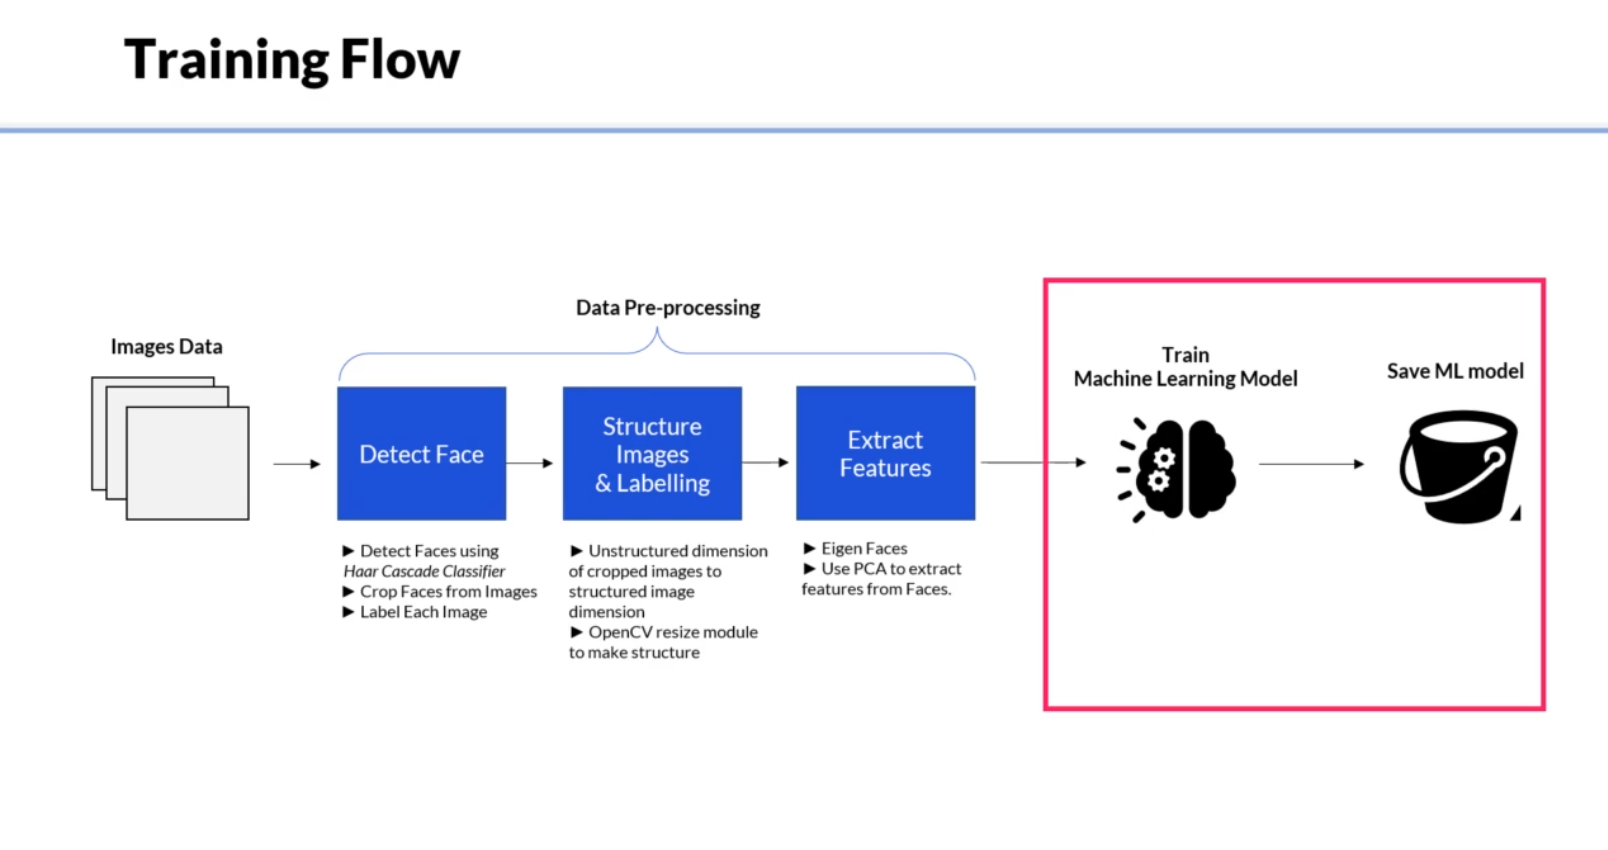

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [4]:
data=np.load('data_pca_50_target.npz')
data.files

['arr_0', 'arr_1']

In [5]:
data.allow_pickle=True

In [7]:
x=data['arr_0']#independent

y=data['arr_1']#dependent

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

### train machiene learning model

In [18]:

# 1. Initialize the base model
model_svc = SVC(probability=True)

# 2. Define the parameter grid (fixed duplicate values and corrected 'coef' to 'coef0')
param_grid = {
    'C': [1, 0.5, 20, 40, 50],  # Removed duplicate 20
    'kernel': ['rbf', 'poly'],
    'gamma': [0.1, 0.05, 0.002, 0.005, 0.09],
    'coef0': [0, 1]  # Changed 'coef' to 'coef0' (correct parameter name for SVC)
}

# 3. Initialize GridSearchCV
model_grid = GridSearchCV(
    estimator=model_svc,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1  # Added to use all CPU cores for faster computation
)

# 4. Fit the model (assuming you have x_train and y_train)
# First verify your data exists and has correct shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Then fit the model
model_grid.fit(x_train, y_train)

# 5. Print the best parameters and score
print("\nBest parameters found:")
print(model_grid.best_params_)
print(f"\nBest accuracy score: {model_grid.best_score_:.4f}")

# 6. (Optional) Evaluate on test set if you have one
if 'x_test' in locals() and 'y_test' in locals():
    test_score = model_grid.score(x_test, y_test)
    print(f"\nTest set accuracy: {test_score:.4f}")

x_train shape: (3455, 50)
y_train shape: (3455,)
Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best parameters found:
{'C': 50, 'coef0': 0, 'gamma': 0.002, 'kernel': 'rbf'}

Best accuracy score: 0.7881

Test set accuracy: 0.7859
